**Informe del Análisis de Calidad de Datos**

Resultados del análisis de calidad de los datos, identificando problemas encontrados (como valores faltantes o inconsistencias) y detallando las soluciones implementadas para garantizar la confiabilidad del análisis posterior.

In [1]:
import pandas as pd

# Load datasets
cash_request_df = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')
fees_df = pd.read_csv('../project_dataset/extract - fees - data analyst - .csv')

# Display basic information about the dataset
print("Basic Information extract - cash request - data analyst.csv:")
print(cash_request_df.info())

Basic Information extract - cash request - data analyst.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                    

In [2]:
# Display basic information about the dataset
print("Basic Information extract - fees - data analyst - .csv:")
print(fees_df.info())

Basic Information extract - fees - data analyst - .csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None


In [3]:
# Evaluate data quality
def evaluate_data_quality(df, df_name):
    print(f"Evaluating data quality for {df_name}...\n")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print(f"Missing values in {df_name}:\n{missing_values}\n")
    
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Duplicate rows in {df_name}: {duplicate_rows}\n")
    
    # Check for inconsistencies (example: negative values in columns that should only have positive values)
    for column in df.select_dtypes(include=['number']).columns:
        negative_values = (df[column] < 0).sum()
        if negative_values > 0:
            print(f"Column '{column}' in {df_name} has {negative_values} negative values.\n")
    
    # Summary statistics
    #print(f"Summary statistics for {df_name}:\n{df.describe()}\n")

In [4]:
# Evaluate data quality for extract - cash request - data analyst dataset
evaluate_data_quality(cash_request_df, 'extract - cash request - data analyst.csv')

Evaluating data quality for extract - cash request - data analyst.csv...

Missing values in extract - cash request - data analyst.csv:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

Duplicate rows in extract - cash request - data analyst.csv: 0



In [5]:
# Evaluate data quality for extract - fees - data analyst dataset
evaluate_data_quality(fees_df, 'extract - fees - data analyst - .csv')

Evaluating data quality for extract - fees - data analyst - .csv...

Missing values in extract - fees - data analyst - .csv:
id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

Duplicate rows in extract - fees - data analyst - .csv: 0



In [6]:
# Rename the columns of the fees dataset
fees_df_modified = fees_df.rename(columns=lambda x: x + '_fee' if x != 'cash_request_id' else x)
print("Result of add '_fee' to each column of extract - fees - data analyst - .csv:")
print(fees_df_modified.info())

Result of add '_fee' to each column of extract - fees - data analyst - .csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_fee             21061 non-null  int64  
 1   cash_request_id    21057 non-null  float64
 2   type_fee           21061 non-null  object 
 3   status_fee         21061 non-null  object 
 4   category_fee       2196 non-null   object 
 5   total_amount_fee   21061 non-null  float64
 6   reason_fee         21061 non-null  object 
 7   created_at_fee     21061 non-null  object 
 8   updated_at_fee     21061 non-null  object 
 9   paid_at_fee        15531 non-null  object 
 10  from_date_fee      7766 non-null   object 
 11  to_date_fee        7766 non-null   object 
 12  charge_moment_fee  21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None


In [7]:
# Merge datasets on matching IDs
merged_df = pd.merge(cash_request_df, fees_df_modified, left_on='id', right_on='cash_request_id', how='inner')
# Save the merged dataset
merged_df.to_csv('../project_dataset/merged_cash_request_fees.csv', index=False)
print("Datasets merged successfully.")

Datasets merged successfully.


In [8]:
print("Merged datasets based on 'id' (extract - cash request - data analyst) and 'cash_request_id' (extract - fees - data analyst) columns:")
print(merged_df.info())

Merged datasets based on 'id' (extract - cash request - data analyst) and 'cash_request_id' (extract - fees - data analyst) columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21057 non-null  int64  
 1   amount                      21057 non-null  float64
 2   status                      21057 non-null  object 
 3   created_at                  21057 non-null  object 
 4   updated_at                  21057 non-null  object 
 5   user_id                     20151 non-null  float64
 6   moderated_at                11284 non-null  object 
 7   deleted_account_id          906 non-null    float64
 8   reimbursement_date          21057 non-null  object 
 9   cash_request_received_date  19763 non-null  object 
 10  money_back_date             19701 non-null  object 
 11  transfer_typ

In [9]:
# Evaluate data quality for merged dataset
evaluate_data_quality(merged_df, 'merged_cash_request_fees.csv')

Evaluating data quality for merged_cash_request_fees.csv...

Missing values in merged_cash_request_fees.csv:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                         906
moderated_at                   9773
deleted_account_id            20151
reimbursement_date                0
cash_request_received_date     1294
money_back_date                1356
transfer_type                     0
send_at                        3487
recovery_status               14163
reco_creation                 14163
reco_last_update              14163
id_fee                            0
cash_request_id                   0
type_fee                          0
status_fee                        0
category_fee                  18861
total_amount_fee                  0
reason_fee                        0
created_at_fee                    0
updated_at_fee             

In [10]:
# Define the data for the table
data = {
    'Column Name': [
        'user_id', 'moderated_at', 'deleted_account_id', 'cash_request_received_date', 
        'money_back_date', 'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
        'category_fee', 'paid_at_fee', 'from_date_fee', 'to_date_fee'
    ],
    'Code': [
        'Null', '98', '98888888', '98', 
        'Null', 'Null', '98', 'Null', 'Null',
        'Null', 'Null', '98', '98'
    ],
    'Explanation': [
        '?', 'No needed a manual review', 'No deleted account', 'No sent a SEPA direct debit', 
        '?', '?', 'The case request never had a payment incident', '?', '?',
        '?', '?', 'No postpone fees', 'No postpones fees'
    ]
}

# Create a DataFrame
missing_info_df = pd.DataFrame(data)

# Display the table
print("Codes for missing information based on Lexique - Data Analyst.xlsx:")
print(missing_info_df)

Codes for missing information based on Lexique - Data Analyst.xlsx:
                   Column Name      Code  \
0                      user_id      Null   
1                 moderated_at        98   
2           deleted_account_id  98888888   
3   cash_request_received_date        98   
4              money_back_date      Null   
5                      send_at      Null   
6              recovery_status        98   
7                reco_creation      Null   
8             reco_last_update      Null   
9                 category_fee      Null   
10                 paid_at_fee      Null   
11               from_date_fee        98   
12                 to_date_fee        98   

                                      Explanation  
0                                               ?  
1                       No needed a manual review  
2                              No deleted account  
3                     No sent a SEPA direct debit  
4                                               ?  
5  

In [11]:
# Fill missing values with specified values
merged_df['user_id'].fillna("Null", inplace=True)
merged_df['moderated_at'].fillna(98, inplace=True)
merged_df['deleted_account_id'].fillna(98888888, inplace=True)
merged_df['cash_request_received_date'].fillna(98, inplace=True)
merged_df['money_back_date'].fillna("Null", inplace=True)
merged_df['send_at'].fillna("Null", inplace=True)
merged_df['recovery_status'].fillna(98, inplace=True)
merged_df['reco_creation'].fillna("Null", inplace=True)
merged_df['reco_last_update'].fillna("Null", inplace=True)

merged_df['category_fee'].fillna("Null", inplace=True)
merged_df['paid_at_fee'].fillna("Null", inplace=True)
merged_df['from_date_fee'].fillna(98, inplace=True)
merged_df['to_date_fee'].fillna(98, inplace=True)

# Save the cleaned dataset
merged_df.to_csv('../project_dataset/cleaned_merged_cash_request_fees.csv', index=False)

print("Missing values have been filled and the cleaned dataset has been saved.")

# Evaluate data quality for cleaned and merged dataset
evaluate_data_quality(merged_df, 'cleaned_merged_cash_request_fees')

Missing values have been filled and the cleaned dataset has been saved.
Evaluating data quality for cleaned_merged_cash_request_fees...

Missing values in cleaned_merged_cash_request_fees:
id                            0
amount                        0
status                        0
created_at                    0
updated_at                    0
user_id                       0
moderated_at                  0
deleted_account_id            0
reimbursement_date            0
cash_request_received_date    0
money_back_date               0
transfer_type                 0
send_at                       0
recovery_status               0
reco_creation                 0
reco_last_update              0
id_fee                        0
cash_request_id               0
type_fee                      0
status_fee                    0
category_fee                  0
total_amount_fee              0
reason_fee                    0
created_at_fee                0
updated_at_fee                0
paid_at_fee

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\1476439258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['user_id'].fillna("Null", inplace=True)
C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\1476439258.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df['user_id'].fillna("Null", inplace=True)
C:\Users\clarg\AppData\Loc

In [12]:
# Convert the 'created_at' and 'created_at_fee' columns to datetime format
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])
merged_df['created_at_fee'] = pd.to_datetime(merged_df['created_at_fee'])

print("Conversion of the 'created_at' and 'created_at_fee' columns to datetime format:")
print(merged_df.info())

Conversion of the 'created_at' and 'created_at_fee' columns to datetime format:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          21057 non-null  int64              
 1   amount                      21057 non-null  float64            
 2   status                      21057 non-null  object             
 3   created_at                  21057 non-null  datetime64[ns, UTC]
 4   updated_at                  21057 non-null  object             
 5   user_id                     21057 non-null  object             
 6   moderated_at                21057 non-null  object             
 7   deleted_account_id          21057 non-null  float64            
 8   reimbursement_date          21057 non-null  object             
 9   cash_request_received_date  21057 non-null  obj

Calidad de los datos necesarios para las métricas:
1. **Frecuencia de Uso del Servicio:** Analizar con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de Business Payments a lo largo del tiempo. (“created_at” “transfer_type”)

In [13]:
# Evaluate data quality for 'created_at' and 'transfer_type' columns
def evaluate_needed_data_quality_for_frecuency(df, columns):
    for column in columns:
        print(f"Evaluating data quality for column: {column}\n")
        
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}\n")
        
        # Check for inconsistencies (example: invalid dates in 'created_at')
        if column == 'created_at':
            invalid_dates = pd.to_datetime(df[column], errors='coerce').isnull().sum()
            print(f"Invalid dates in {column}: {invalid_dates}\n")
        
        # Check for unique values in 'transfer_type'
        if column == 'transfer_type':
            unique_values = df[column].unique()
            print(f"Unique values in {column}: {unique_values}\n")

# Columns to evaluate
columns_to_evaluate = ['created_at', 'transfer_type']

# Evaluate data quality
evaluate_needed_data_quality_for_frecuency(merged_df, columns_to_evaluate)

Evaluating data quality for column: created_at

Missing values in created_at: 0

Invalid dates in created_at: 0

Evaluating data quality for column: transfer_type

Missing values in transfer_type: 0

Unique values in transfer_type: ['instant' 'regular']



2. **Tasa de Incidentes:** Determinar la tasa de incidentes, especialmente aquellos relacionados con problemas de pago, en cada cohorte. Identificar variaciones significativas entre cohortes. (“recovery_status: pending, pending_direct_debit”)

In [14]:
# Evaluate data quality for 'recovery_status' column
def evaluate_data_quality_for_recovery_status(df):
    column = 'recovery_status'
    print(f"Evaluating data quality for column: {column}\n")
    
    # Check for missing values
    missing_values = df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}\n")
    
    # Check for specific values 'pending' and 'pending_direct_debit'
    pending_count = df[df[column] == 'pending'].shape[0]
    pending_direct_debit_count = df[df[column] == 'pending_direct_debit'].shape[0]
    print(f"Count of 'pending' in {column}: {pending_count}\n")
    print(f"Count of 'pending_direct_debit' in {column}: {pending_direct_debit_count}\n")
    
    # Check for unique values in 'recovery_status'
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}\n")

# Evaluate data quality
evaluate_data_quality_for_recovery_status(merged_df)

Evaluating data quality for column: recovery_status

Missing values in recovery_status: 0

Count of 'pending' in recovery_status: 1914

Count of 'pending_direct_debit' in recovery_status: 34

Unique values in recovery_status: [98 'pending' 'completed' 'pending_direct_debit' 'cancelled']



3. **Ingresos Generados por Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo del tiempo para evaluar el impacto financiero del comportamiento de los usuarios. (“total_amount” “created_at” “created_at_fee”)

In [15]:
# Evaluate data quality for specified columns
def evaluate_data_quality_for_income(df, columns):
    data_quality_issues = {}
    
    for column in columns:
        print(f"Evaluating data quality for column: {column}\n")
        
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}\n")
        
        # Check for inconsistencies (example: invalid dates in 'created_at' and 'created_at_fee')
        if column in ['created_at', 'created_at_fee']:
            invalid_dates = pd.to_datetime(df[column], errors='coerce').isnull().sum()
            print(f"Invalid dates in {column}: {invalid_dates}\n")
        
        # Check for negative values in 'total_amount'
        if column == 'total_amount_fee':
            negative_values = (df[column] < 0).sum()
            print(f"Negative values in {column}: {negative_values}\n")
        
        # Document the issues
        data_quality_issues[column] = {
            'missing_values': missing_values,
            'invalid_dates': invalid_dates if column in ['created_at', 'created_at_fee'] else None,
            'negative_values': negative_values if column == 'total_amount_fee' else None
        }
    
    return data_quality_issues

# Columns to evaluate
columns_to_evaluate = ['total_amount_fee', 'created_at', 'created_at_fee']

# Evaluate data quality
evaluate_data_quality_for_income(merged_df, columns_to_evaluate)

Evaluating data quality for column: total_amount_fee

Missing values in total_amount_fee: 0

Negative values in total_amount_fee: 0

Evaluating data quality for column: created_at

Missing values in created_at: 0

Invalid dates in created_at: 0

Evaluating data quality for column: created_at_fee

Missing values in created_at_fee: 0

Invalid dates in created_at_fee: 0



{'total_amount_fee': {'missing_values': np.int64(0),
  'invalid_dates': None,
  'negative_values': np.int64(0)},
 'created_at': {'missing_values': np.int64(0),
  'invalid_dates': np.int64(0),
  'negative_values': None},
 'created_at_fee': {'missing_values': np.int64(0),
  'invalid_dates': np.int64(0),
  'negative_values': None}}

4. **Métricas Acumuladas por Cohorte:** Proponer y calcular métricas acumuladas que proporcionen perspectivas adicionales para la extracción de insights accionables.

In [83]:
#TBD

**Análisis EDA**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\583913756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recovery_counts.index, y=recovery_counts.values, palette="viridis")


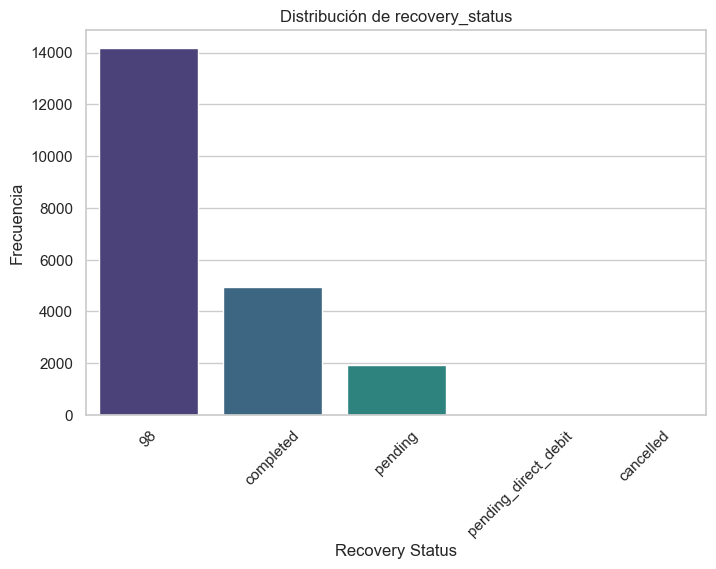

In [17]:
# Vamos a trabajar sobre la predicción de las variables status recovery inicialmente:
# ya que solo dispone de 6.894 registros tienen valor asignado.

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Análisis de la variable objetivo (recovery_status)
plt.figure(figsize=(8, 5))
recovery_counts = merged_df['recovery_status'].value_counts(dropna=False)
sns.barplot(x=recovery_counts.index, y=recovery_counts.values, palette="viridis")
plt.title("Distribución de recovery_status")
plt.xlabel("Recovery Status")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

*La mayor parte de los valores se encuentran como que nunca se ha recibido ninguna incidencia sobre ese cash request*

*Sobre los otros posibles valores, se indica si una vez creada la incidencia se ha completado, pendiente, cancelada o pendiente pero con una transferencia SEPA en proceso.

**Analisis Univariado**

In [18]:
# Transormar variables (status, transfer_type, type_fee, status_fee, category_fee) en variables numericas.
# Usamos One-Hot Encoding para variables categoricas.

encoded_data = pd.get_dummies(merged_df, columns=['transfer_type', 'type_fee', 'status_fee'], drop_first=True)



In [19]:
# Asegurarse de que las columnas estén en formato datetime
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], errors='coerce')
merged_df['updated_at'] = pd.to_datetime(merged_df['updated_at'], errors='coerce')

# Calcular el tiempo transcurrido entre created_at y updated_at
merged_df['time_diff'] = (merged_df['updated_at'] - merged_df['created_at']).dt.total_seconds()

# Extraer componentes de fecha de created_at
merged_df['created_year'] = merged_df['created_at'].dt.year
merged_df['created_month'] = merged_df['created_at'].dt.month
merged_df['created_day'] = merged_df['created_at'].dt.day
merged_df['created_weekday'] = merged_df['created_at'].dt.weekday  # 0 = Lunes, 6 = Domingo
merged_df['created_hour'] = merged_df['created_at'].dt.hour

# Extraer componentes de fecha de updated_at
merged_df['updated_year'] = merged_df['updated_at'].dt.year
merged_df['updated_month'] = merged_df['updated_at'].dt.month
merged_df['updated_day'] = merged_df['updated_at'].dt.day
merged_df['updated_weekday'] = merged_df['updated_at'].dt.weekday
merged_df['updated_hour'] = merged_df['updated_at'].dt.hour

# Vista previa de las nuevas columnas
print(merged_df[['created_at', 'updated_at', 'time_diff', 'created_year', 'created_month']].head())


                        created_at                       updated_at  \
0 2020-10-23 15:20:26.163927+00:00 2020-12-18 13:08:29.099365+00:00   
1 2020-05-27 02:26:27.615190+00:00 2020-06-09 11:25:51.726360+00:00   
2 2020-07-01 09:30:03.145410+00:00 2020-08-11 22:27:58.240406+00:00   
3 2020-07-01 09:30:03.145410+00:00 2020-08-11 22:27:58.240406+00:00   
4 2020-07-01 09:30:03.145410+00:00 2020-08-11 22:27:58.240406+00:00   

      time_diff  created_year  created_month  
0  4.830483e+06          2020             10  
1  1.155564e+06          2020              5  
2  3.589075e+06          2020              7  
3  3.589075e+06          2020              7  
4  3.589075e+06          2020              7  


In [21]:
# Análisis de variables numéricas
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
print("Resumen de estadísticas de variables numéricas:")
print(merged_df[numeric_columns].describe())

Resumen de estadísticas de variables numéricas:
                 id        amount  deleted_account_id        id_fee  \
count  21057.000000  21057.000000        2.105700e+04  21057.000000   
mean   16318.449162     81.833547        9.463483e+07  10646.670228   
std     6656.149949     26.945058        2.006308e+07   6099.136169   
min     1456.000000      1.000000        3.857000e+03      1.000000   
25%    11745.000000     50.000000        9.888889e+07   5388.000000   
50%    17160.000000    100.000000        9.888889e+07  10654.000000   
75%    21796.000000    100.000000        9.888889e+07  15926.000000   
max    27010.000000    200.000000        9.888889e+07  21193.000000   

       cash_request_id  total_amount_fee     time_diff  
count     21057.000000      21057.000000  2.105700e+04  
mean      16318.449162          5.000237  8.327430e+06  
std        6656.149949          0.034457  3.754475e+06  
min        1456.000000          5.000000  2.433921e+01  
25%       11745.000000     

**amount** *tiene un comportamiento sesgado hacia valores altos (mediana en 100). Esto podría afectar la predicción y merece exploración.*

**total_amount_fee** *parece una variable discreta con un rango pequeño (5-10), lo que la hace menos informativa.*

**time_diff** *tiene una variación significativa y podría ser clave en la predicción si se relaciona con recovery_status.*

*Las variables binarias como is_weekend_created y is_weekend_updated muestran patrones claros que podrían ser relevantes para la predicción.*

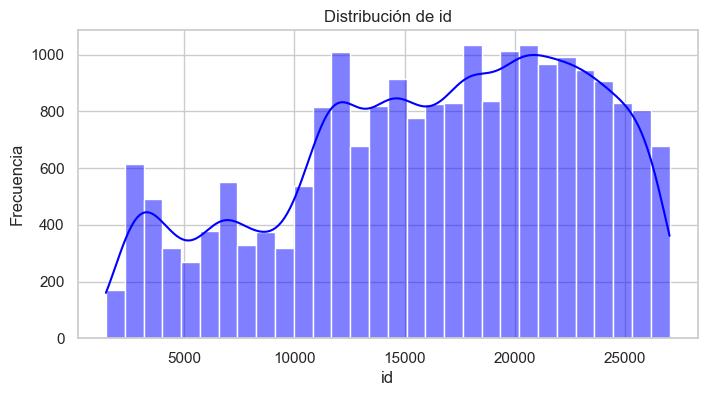

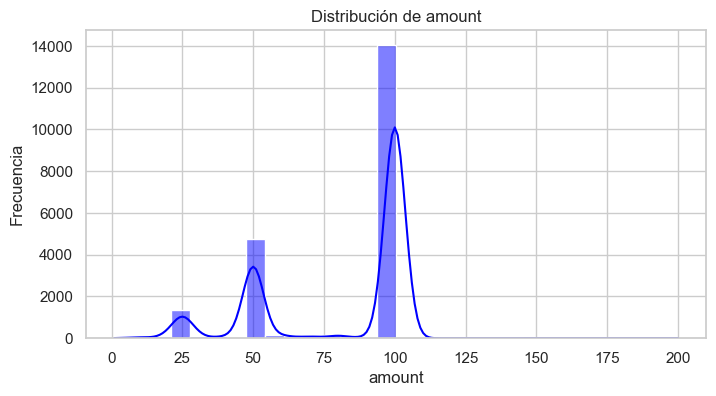

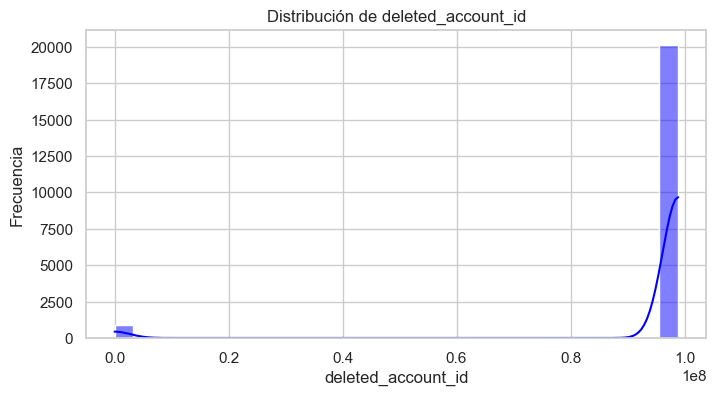

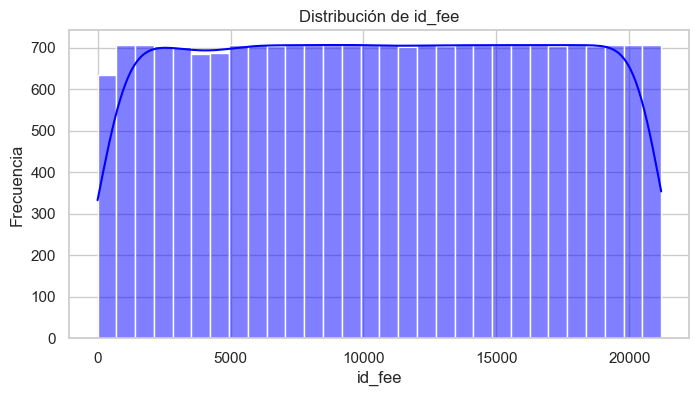

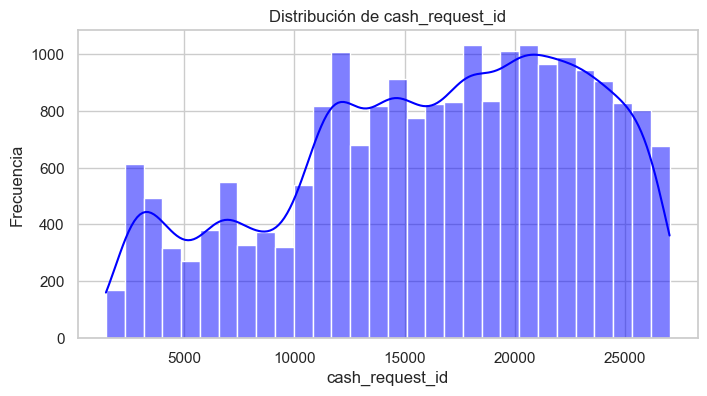

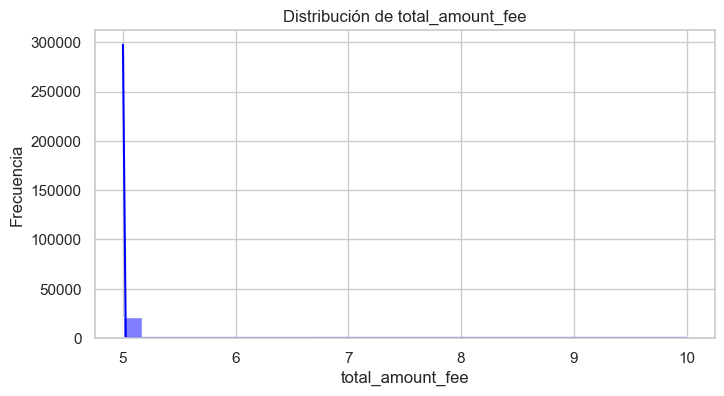

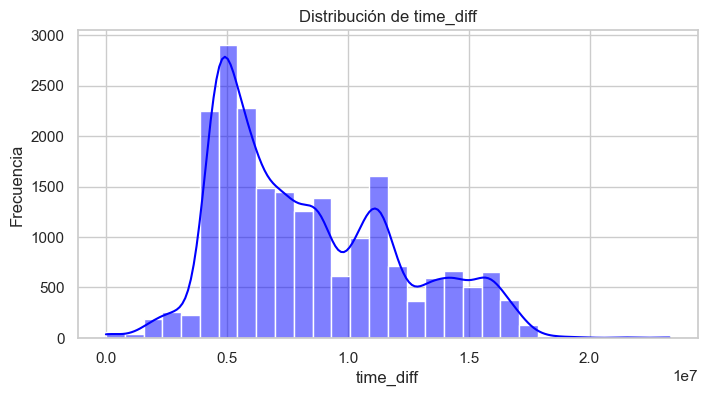

In [22]:
# Gráficos de distribución para variables numéricas
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_df[col].dropna(), kde=True, bins=30, color="blue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [24]:
# Análisis de variables categóricas
categorical_columns = merged_df.select_dtypes(include=['object']).columns
print("\nFrecuencias de las variables categóricas principales:")
for col in categorical_columns:
    print(f"\n{col}:\n{merged_df[col].value_counts(dropna=False)}")


Frecuencias de las variables categóricas principales:

status:
status
money_back               18918
direct_debit_rejected     1858
active                     155
direct_debit_sent           72
transaction_declined        48
canceled                     6
Name: count, dtype: int64

user_id:
user_id
Null        906
16391.0      37
15593.0      28
3045.0       25
17144.0      24
           ... 
83051.0       1
86783.0       1
102737.0      1
3377.0        1
71780.0       1
Name: count, Length: 8873, dtype: int64

moderated_at:
moderated_at
98                               9773
2020-08-12 21:13:52.19632+00       35
2020-06-25 11:28:00.841496+00      28
2020-06-22 15:36:51.105835+00      24
2020-08-14 10:37:55.282194+00      23
                                 ... 
2020-10-03 12:06:48.027259+00       1
2020-10-01 12:07:55.027119+00       1
2020-10-22 07:54:56.538749+00       1
2020-10-01 18:07:29.31727+00        1
2020-05-15 12:47:01.358867+00       1
Name: count, Length: 5561, dtype: int

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\3598553054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=col, palette="viridis", order=merged_df[col].value_counts().index)


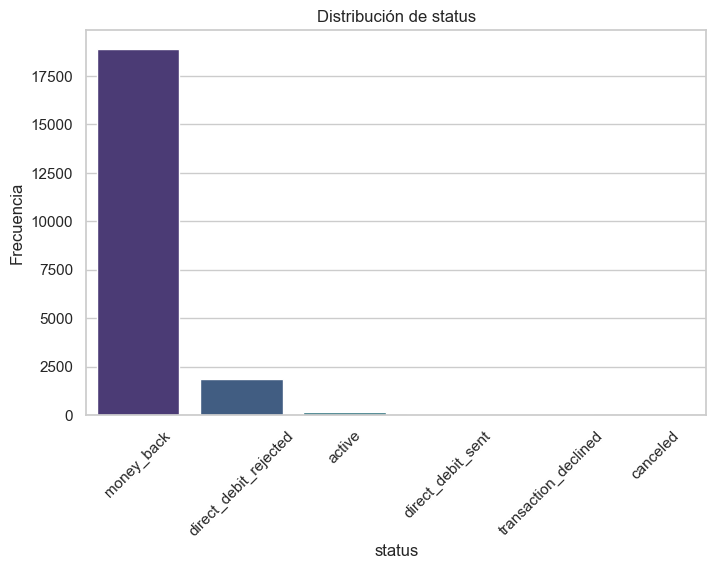

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\3598553054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=col, palette="viridis", order=merged_df[col].value_counts().index)


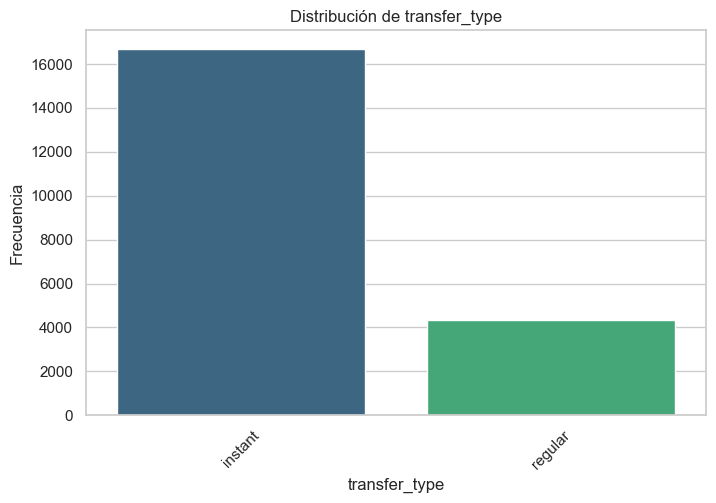

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\3598553054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=col, palette="viridis", order=merged_df[col].value_counts().index)


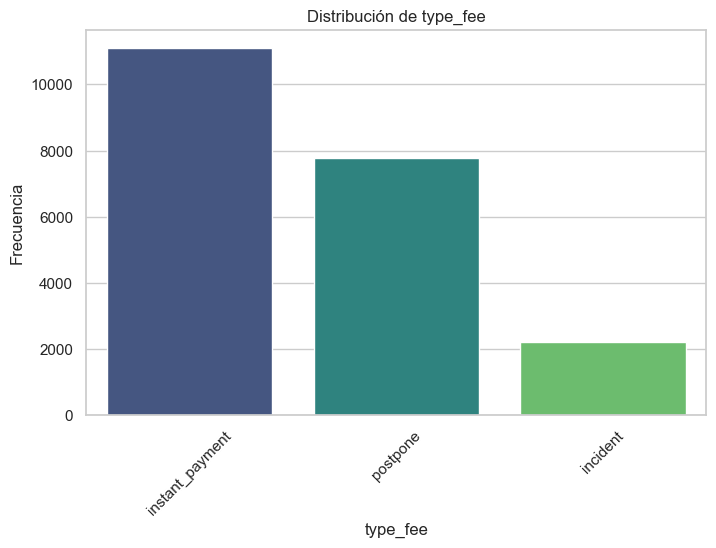

In [23]:
# Gráficos de frecuencias para variables categóricas seleccionadas
categorical_to_plot = ["status", "transfer_type", "type_fee"]  # Agrega las columnas que quieras analizar
for col in categorical_to_plot:
    if col in merged_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=merged_df, x=col, palette="viridis", order=merged_df[col].value_counts().index)
        plt.title(f"Distribución de {col}")
        plt.xticks(rotation=45)
        plt.ylabel("Frecuencia")
        plt.show()

**Analisis Bivariado para explicar la variable recovery_status**

Estadísticas agrupadas por recovery_status:
                                id      amount  deleted_account_id  \
recovery_status                                                      
98                    17565.157311   82.174398        9.555901e+07   
cancelled             23127.000000  100.000000        9.888889e+07   
completed             13851.775935   81.262487        9.149094e+07   
pending               13494.547022   80.710554        9.584097e+07   
pending_direct_debit  14515.852941   85.588235        9.888889e+07   

                            id_fee  cash_request_id  total_amount_fee  \
recovery_status                                                         
98                    11195.305091     17565.157311          5.000353   
cancelled             16008.000000     23127.000000          5.000000   
completed              9281.886957     13851.775935          5.000000   
pending               10130.268548     13494.547022          5.000000   
pending_direct_debit   9516

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\3458553208.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  numeric_stats = merged_df.groupby('recovery_status')[numeric_columns].mean()


money_back_date: chi2=58706.16, p-value=0.000
transfer_type: chi2=1147.78, p-value=0.000
send_at: chi2=69478.84, p-value=0.000
recovery_status: chi2=84228.00, p-value=0.000
reco_creation: chi2=84228.00, p-value=0.000
reco_last_update: chi2=84228.00, p-value=0.000
type_fee: chi2=5413.51, p-value=0.000
status_fee: chi2=9537.93, p-value=0.000
category_fee: chi2=5954.28, p-value=0.000
reason_fee: chi2=69952.97, p-value=0.000
updated_at_fee: chi2=84228.00, p-value=0.495
paid_at_fee: chi2=62510.36, p-value=0.132
from_date_fee: chi2=5808.08, p-value=0.000
to_date_fee: chi2=7609.90, p-value=0.000
charge_moment_fee: chi2=214.45, p-value=0.000


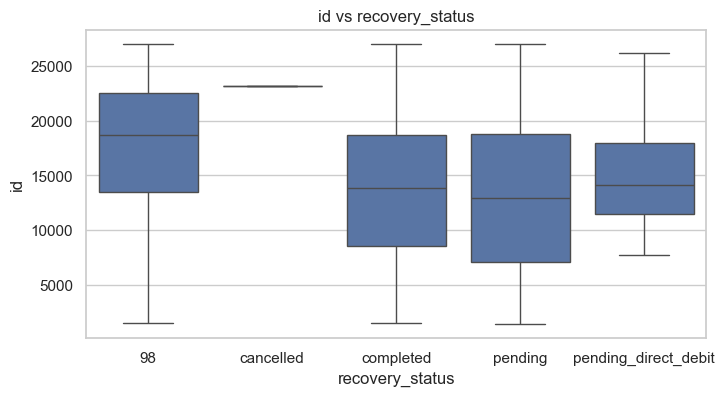

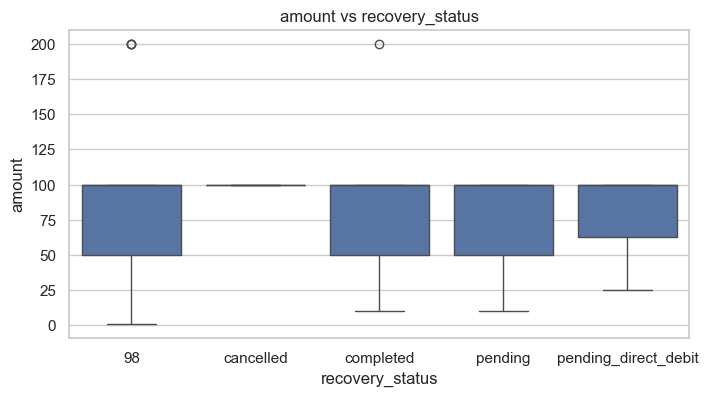

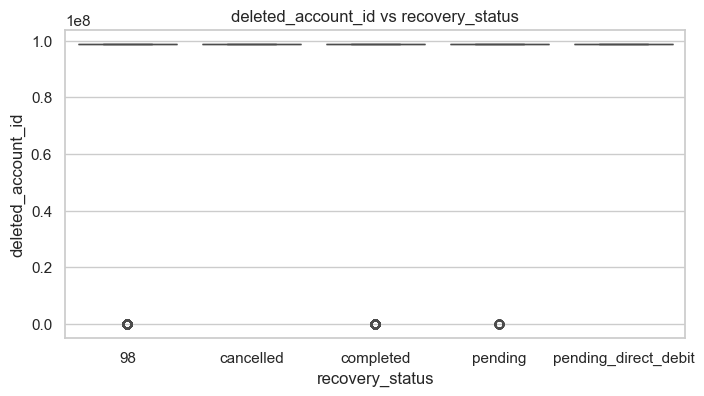

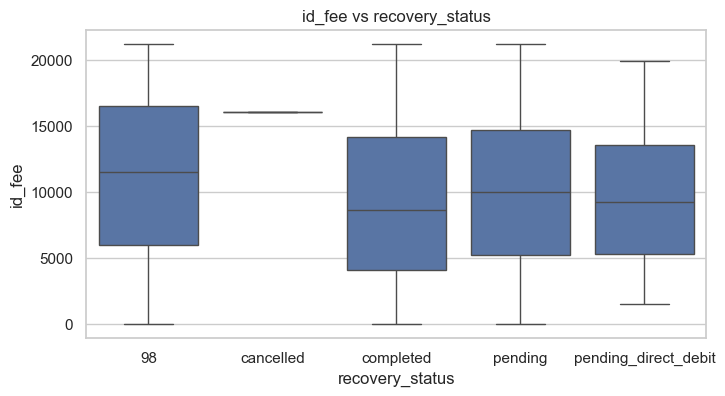

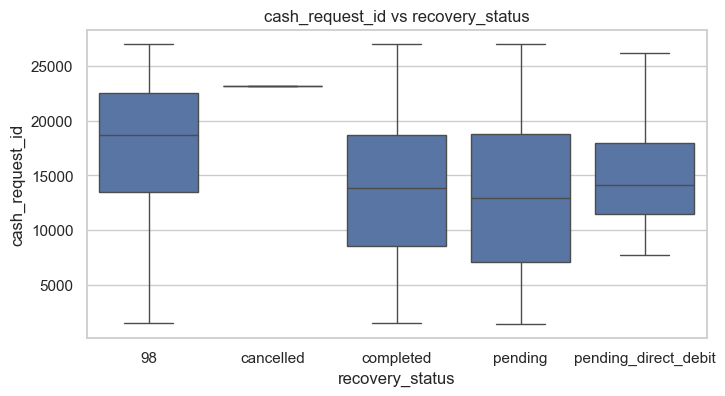

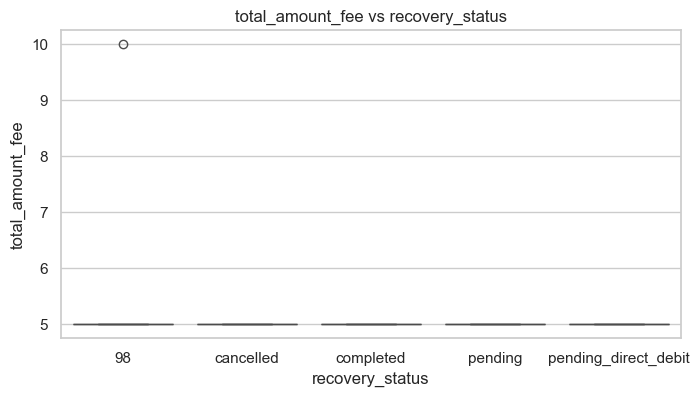

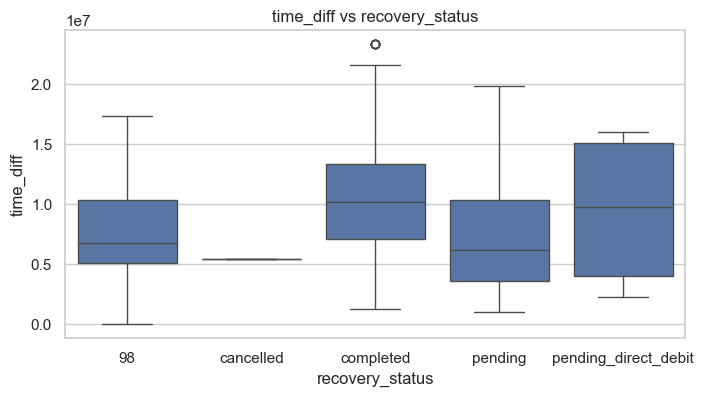

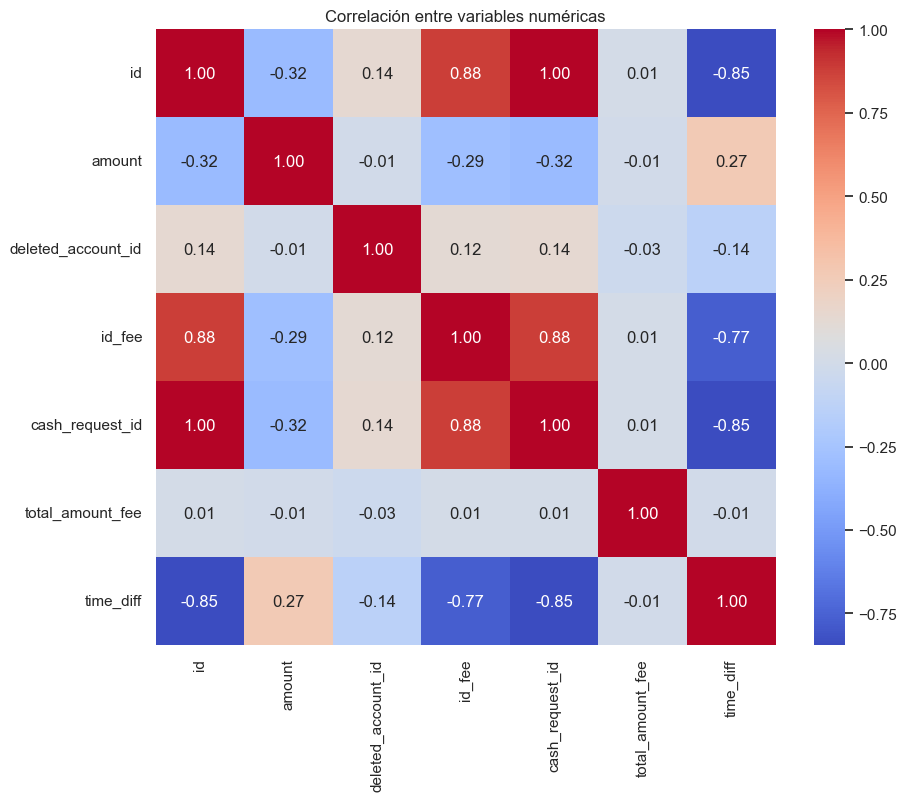

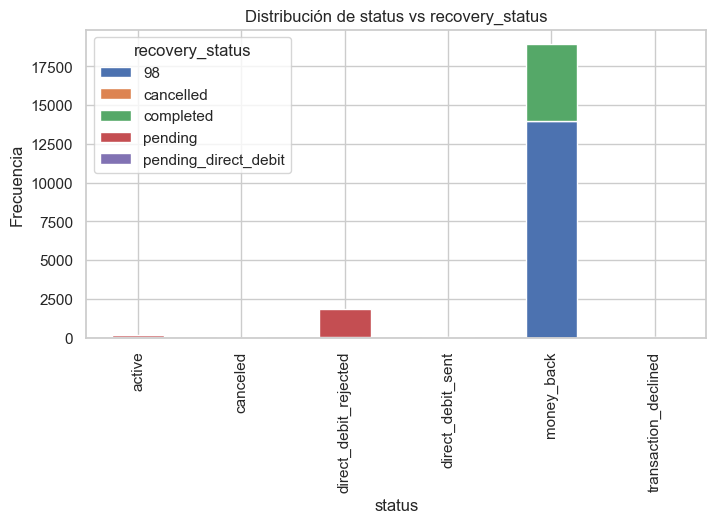

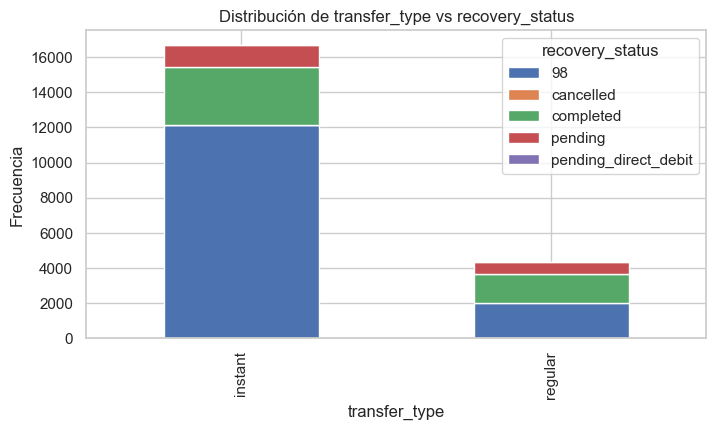

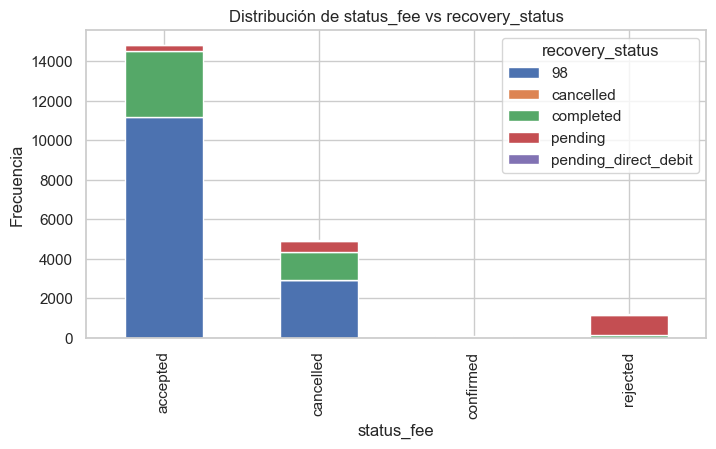

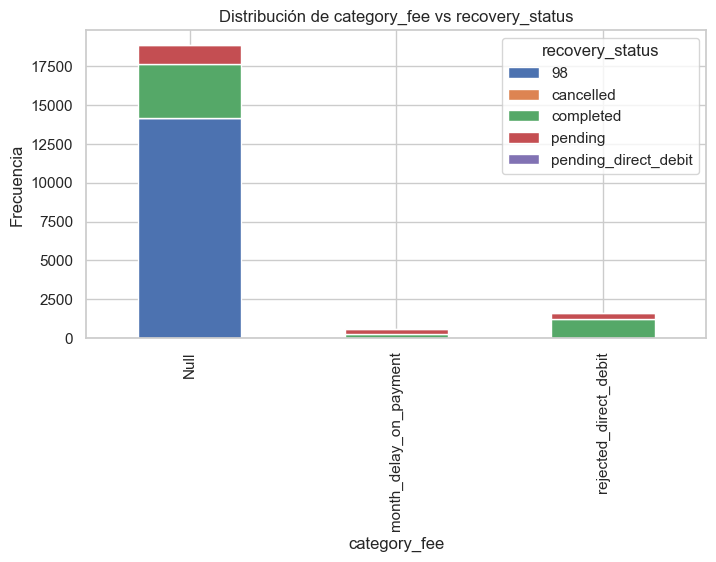

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr, spearmanr

# Asegurarse de que las variables categóricas sean de tipo 'category'
categorical_columns = merged_df.select_dtypes(include=['object', 'category', 'bool']).columns

# Convertir las columnas categóricas a 'category' explícitamente
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

# 1. Estadísticas de variables numéricas agrupadas por recovery_status
print("Estadísticas agrupadas por recovery_status:")
numeric_stats = merged_df.groupby('recovery_status')[numeric_columns].mean()
print(numeric_stats)

# 2. Correlación entre variables numéricas y recovery_status (Point-Biserial Correlation)
print("\nCorrelación entre variables numéricas y recovery_status:")
for col in numeric_columns:
    if col != 'recovery_status':
        corr, _ = pointbiserialr(merged_df['recovery_status'].cat.codes, merged_df[col])
        print(f"{col}: {corr:.3f}")

# 3. Pruebas chi-cuadrado para variables categóricas
print("\nPruebas Chi-cuadrado entre variables categóricas y recovery_status:")
for col in categorical_columns:
    # Si hay valores nulos, eliminarlos antes de la prueba
    contingency_table = pd.crosstab(merged_df[col].dropna(), merged_df['recovery_status'].dropna())
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.3f}")

# 4. Visualizaciones
# a) Boxplots para variables numéricas vs recovery_status
for col in numeric_columns:
    if col != 'recovery_status':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='recovery_status', y=col, data=merged_df)
        plt.title(f"{col} vs recovery_status")
        plt.show()

# b) Heatmap para correlaciones entre numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlación entre variables numéricas")
plt.show()

# Listar las columnas específicas que deseas analizar
specific_columns = ['status', 'transfer_type', 'distribuciontype_fee', 'status_fee', 'category_fee']

# c) Gráficos de barras para variables categóricas vs recovery_status
for col in specific_columns:
    if col in merged_df.columns:  
        contingency_table = pd.crosstab(merged_df[col], merged_df['recovery_status'])
        
        # Crear gráfico de barras apiladas
        contingency_table.plot(kind='bar', stacked=True, figsize=(8, 4))
        plt.title(f"Distribución de {col} vs recovery_status")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.legend(title='recovery_status')
        plt.show()





*Variables con p-value < 0.05: Existe una relación significativa con recovery_status.* **Estas variables incluyen moderated_at, reimbursement_date, send_at, type_fee, status_fee, etc.**

*Variables con p-value > 0.05: No hay relación significativa con recovery_status.* **Ejemplos de estas son updated_at_fee y paid_at_fee.**

**Variables a tener en cuenta modelo predictivo**
*Ejemplos de variables con un p-value < 0.05 y Chi-cuadrado significativo:*

*moderated_at: chi2=41894.79, p-value=0.000*

*reimbursement_date: chi2=15903.45, p-value=0.000*

*send_at: chi2=69478.84, p-value=0.000*

*type_fee: chi2=5413.51, p-value=0.000*

*status_fee: chi2=9537.93, p-value=0.000*


**FRECUENCIA DE USO DEL SERVICIO**

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\3950901101.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['quarter'] = merged_df['created_at'].dt.to_period('Q')
C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\3950901101.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['cohort'] = merged_df.groupby('id')['created_at'].transform('min').dt.to_period('Q')


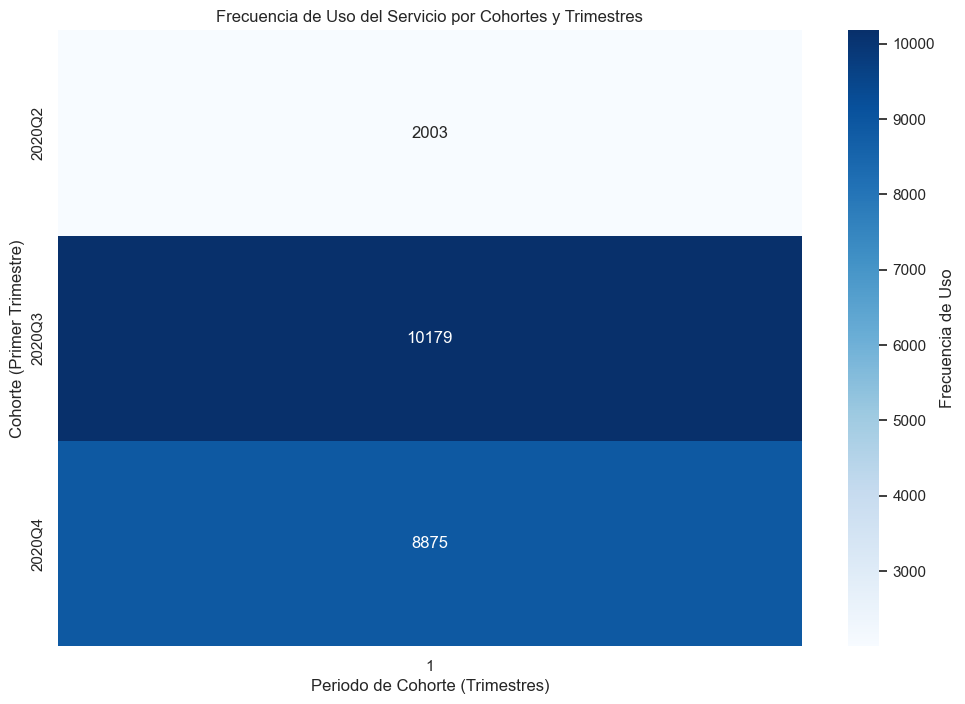

In [27]:

# Crear una columna para el trimestre
merged_df['quarter'] = merged_df['created_at'].dt.to_period('Q')

# Crear una columna para la cohorte (el primer trimestre en el que un usuario realizó su primer evento)
merged_df['cohort'] = merged_df.groupby('id')['created_at'].transform('min').dt.to_period('Q')

# Calcular el periodo de cohorte (el número de trimestres desde el primer evento)
merged_df['cohort_period'] = (merged_df['created_at'].dt.year - merged_df['cohort'].dt.year) * 4 + (merged_df['created_at'].dt.quarter - merged_df['cohort'].dt.quarter) + 1

# Filtrar solo las filas relevantes de "transfer_type" (por ejemplo, 'cash_advance' si tienes esa información)
# Si "transfer_type" tiene varios tipos, puedes filtrar el tipo que te interese.
merged_df = merged_df[merged_df['transfer_type'].notnull()]

# 1. Calcular la frecuencia de uso del servicio por cohorte y periodo de cohorte
cohort_usage = merged_df.groupby(['cohort', 'cohort_period']).size().reset_index(name='usage_count')

# 2. Pivotear los datos para obtener una tabla más fácil de analizar
cohort_usage_pivot = cohort_usage.pivot(index='cohort', columns='cohort_period', values='usage_count')

# 3. Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_usage_pivot, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Frecuencia de Uso'})
plt.title("Frecuencia de Uso del Servicio por Cohortes y Trimestres")
plt.xlabel("Periodo de Cohorte (Trimestres)")
plt.ylabel("Cohorte (Primer Trimestre)")
plt.show()


**TASA DE INCIDENTES**

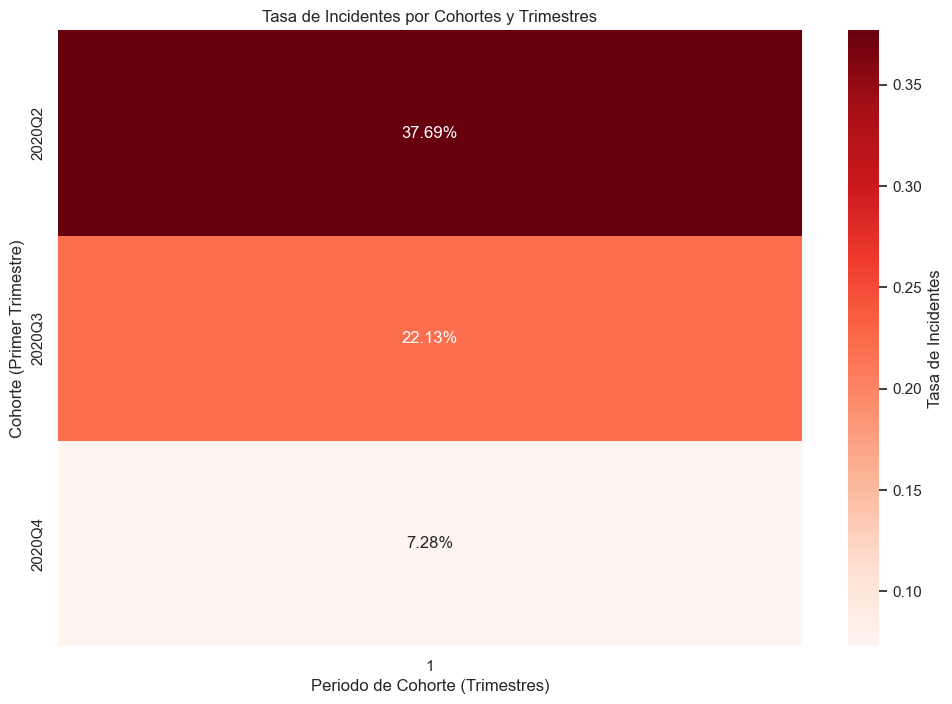

In [28]:
# Calcular el periodo de cohorte (el número de trimestres desde el primer evento)
merged_df['cohort_period'] = (merged_df['created_at'].dt.year - merged_df['cohort'].dt.year) * 4 + (merged_df['created_at'].dt.quarter - merged_df['cohort'].dt.quarter) + 1

# Filtrar solo los incidentes relacionados con problemas de pago (recovery_status: 'pending' y 'pending_direct_debit')
incident_df = merged_df[merged_df['recovery_status'].isin(['pending', 'pending_direct_debit'])]

# 1. Calcular el número de incidentes por cohorte y periodo de cohorte
cohort_incidents = incident_df.groupby(['cohort', 'cohort_period']).size().reset_index(name='incident_count')

# 2. Calcular el número total de usuarios por cohorte y periodo
cohort_users = merged_df.groupby(['cohort', 'cohort_period'])['id'].nunique().reset_index(name='user_count')

# 3. Unir ambos DataFrames para calcular la tasa de incidentes
cohort_data = pd.merge(cohort_incidents, cohort_users, on=['cohort', 'cohort_period'])

# 4. Calcular la tasa de incidentes (número de incidentes dividido por el número total de usuarios)
cohort_data['incident_rate'] = cohort_data['incident_count'] / cohort_data['user_count']

# 5. Pivotear los datos para obtener una tabla de tasas de incidentes por cohorte y periodo
cohort_incident_rate_pivot = cohort_data.pivot(index='cohort', columns='cohort_period', values='incident_rate')

# 6. Visualización de la tasa de incidentes
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_incident_rate_pivot, annot=True, fmt='.2%', cmap='Reds', cbar_kws={'label': 'Tasa de Incidentes'})
plt.title("Tasa de Incidentes por Cohortes y Trimestres")
plt.xlabel("Periodo de Cohorte (Trimestres)")
plt.ylabel("Cohorte (Primer Trimestre)")
plt.show()


**INGRESOS GENERADOS POR COHORTE**

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\386468357.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['cohort'] = merged_df.groupby('id')['created_at'].transform('min').dt.to_period('Q')


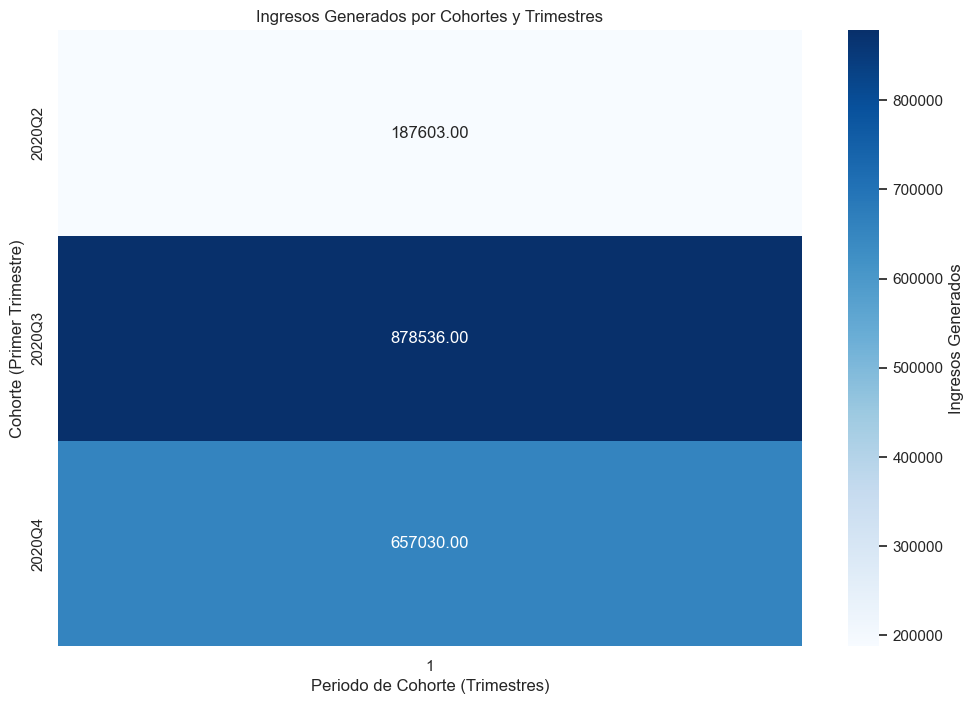

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\386468357.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_data = merged_df.groupby(['cohort', 'cohort_period', 'recovery_status']).size().reset_index(name='count')
C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\386468357.py:36: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cohort_pivot = cohort_data.pivot_table(index=['cohort'], columns=['cohort_period', 'recovery_status'], values='count', fill_value=0)


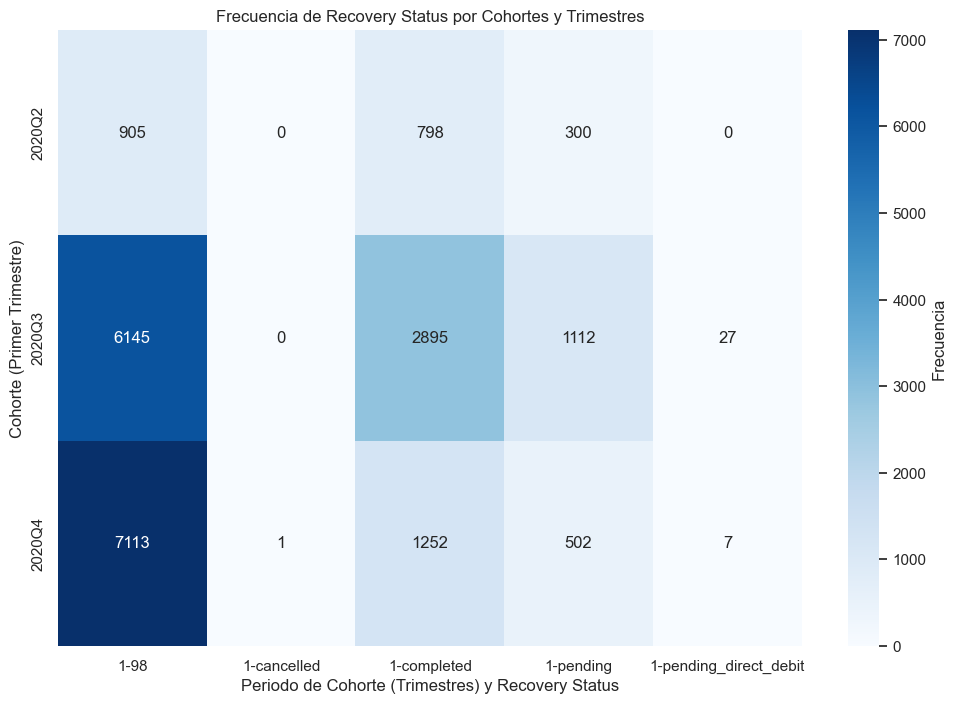

C:\Users\clarg\AppData\Local\Temp\ipykernel_20256\386468357.py:56: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cohort_proportion_pivot = cohort_data.pivot_table(index=['cohort'], columns=['cohort_period', 'recovery_status'], values='proportion', fill_value=0)


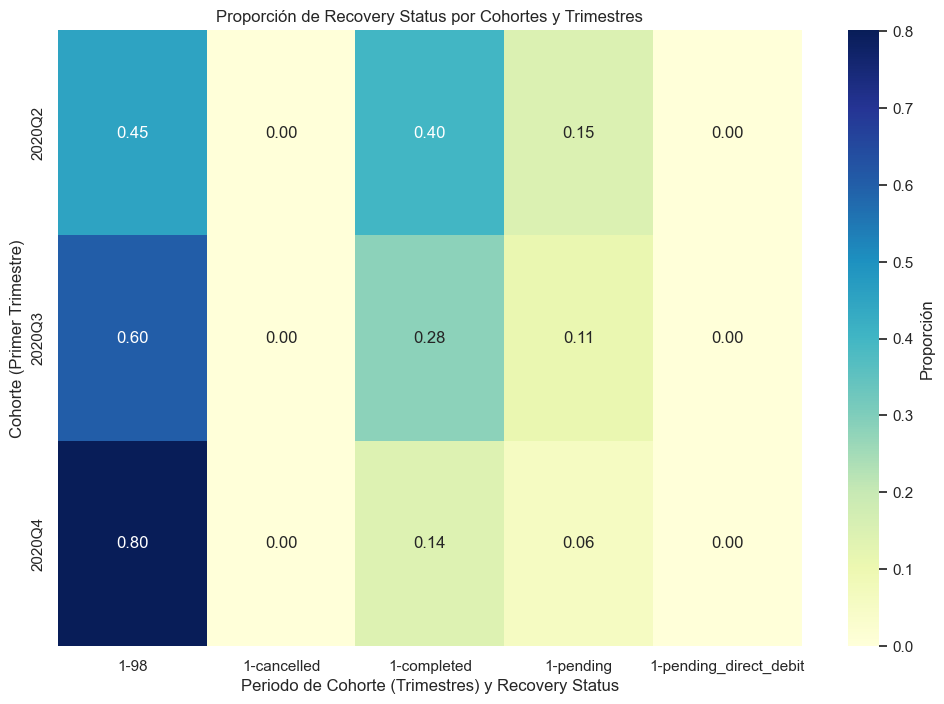

In [37]:
# 1. Asegurarse de que la columna 'amount' existe y tiene datos numéricos
if 'amount' not in merged_df.columns:
    print("La columna 'amount' no existe. Verificando otras columnas para calcular los ingresos.")
    # Si no existe la columna 'amount', puedes crearla si se puede derivar de otras columnas
    # Por ejemplo, si se puede calcular con base en la columna 'total_amount_fee'
    # merged_df['amount'] = merged_df['total_amount_fee']  # Ajusta esto según tu estructura
else:
    # Convertir la columna 'amount' a tipo numérico si es necesario
    merged_df['amount'] = pd.to_numeric(merged_df['amount'], errors='coerce')

# 2. Crear una columna para la cohorte (el primer trimestre en el que un usuario realizó su primer evento)
merged_df['cohort'] = merged_df.groupby('id')['created_at'].transform('min').dt.to_period('Q')

# 3. Calcular el periodo de cohorte (el número de trimestres desde el primer evento)
merged_df['cohort_period'] = (merged_df['created_at'].dt.year - merged_df['cohort'].dt.year) * 4 + (merged_df['created_at'].dt.quarter - merged_df['cohort'].dt.quarter) + 1

# 4. Calcular los ingresos generados por cohorte y periodo
# Agrupar por cohorte y periodo para calcular los ingresos
cohort_revenue = merged_df.groupby(['cohort', 'cohort_period'])['amount'].sum().reset_index(name='revenue')

# 5. Pivotear los datos para obtener una tabla de ingresos por cohorte y periodo
cohort_revenue_pivot = cohort_revenue.pivot(index='cohort', columns='cohort_period', values='revenue')

# 6. Visualización de los ingresos generados por cohorte
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_revenue_pivot, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Ingresos Generados'})
plt.title("Ingresos Generados por Cohortes y Trimestres")
plt.xlabel("Periodo de Cohorte (Trimestres)")
plt.ylabel("Cohorte (Primer Trimestre)")
plt.show()

# 7. Calcular la frecuencia de 'recovery_status' por cohorte y cohorte_period
cohort_data = merged_df.groupby(['cohort', 'cohort_period', 'recovery_status']).size().reset_index(name='count')

# 8. Pivotear los datos para que sea más fácil de analizar
cohort_pivot = cohort_data.pivot_table(index=['cohort'], columns=['cohort_period', 'recovery_status'], values='count', fill_value=0)

# 9. Visualización de la frecuencia de los estados de recovery_status por cohorte y periodo
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Frecuencia'})  # Cambio aquí: fmt='.0f'
plt.title("Frecuencia de Recovery Status por Cohortes y Trimestres")
plt.xlabel("Periodo de Cohorte (Trimestres) y Recovery Status")
plt.ylabel("Cohorte (Primer Trimestre)")
plt.show()

# 10. Calcular la proporción de cada estado dentro de cada cohorte:
cohort_total = merged_df.groupby(['cohort', 'cohort_period']).size().reset_index(name='total')

# 11. Unir los datos con el total de cada cohorte
cohort_data = cohort_data.merge(cohort_total, on=['cohort', 'cohort_period'])

# 12. Calcular la proporción de cada estado
cohort_data['proportion'] = cohort_data['count'] / cohort_data['total']

# 13. Pivotear los datos para obtener la proporción
cohort_proportion_pivot = cohort_data.pivot_table(index=['cohort'], columns=['cohort_period', 'recovery_status'], values='proportion', fill_value=0)

# 14. Visualización de la proporción de los estados de recovery_status por cohorte y periodo
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_proportion_pivot, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Proporción'})
plt.title("Proporción de Recovery Status por Cohortes y Trimestres")
plt.xlabel("Periodo de Cohorte (Trimestres) y Recovery Status")
plt.ylabel("Cohorte (Primer Trimestre)")
plt.show()



